# Function to get pixel array

In [6]:
from PIL import Image
import torch
import utils
import numpy as np
import torchvision.transforms as transforms
def get_pixels_array(filelist: list)-> np.array:
    """Function to obtain pixels array of image in filelist
    
    Args:
        filelist (list): list of image paths, can be RGB or greyscale
    
    Returns:
        np.array(list_pixels_arr): Array of list of arrays with pixel values
        of each image
    """

    list_pixels_arr = []

    for img in filelist:
        im = (Image.open(img))
        transform = transforms.ToTensor()
        tensor = transform(im)
        list_pixels_arr.append(tensor)

    return list_pixels_arr

# Get image array tensors

In [14]:

file_paths_1 = utils.get_files_path('train/masks')
file_paths_2 = utils.get_files_path('train/masks')

list_pixels_arr_1 = get_pixels_array(file_paths_1)
list_pixels_arr_2 = get_pixels_array(file_paths_1)


# Accuracy

In [9]:
def getaccuracy(list_pixels_arr_1, list_pixels_arr_2):
    accuracy_dict = {}
    for i in range(len(list_pixels_arr_1)):
        y_pred = list_pixels_arr_1[i]
        y_true = list_pixels_arr_2[i]
        with torch.no_grad():
            correct = torch.eq(y_pred, y_true).int()
            accuracy = float(correct.sum()) / float(correct.numel())
            accuracy_dict[i] = accuracy
    return accuracy_dict


In [10]:
accuracy_dict = getaccuracy(list_pixels_arr_1, list_pixels_arr_2)

# MultiDICE

In [33]:
def multiDICE(list_pixels_arr_1, list_pixels_arr_2, num_classes: int) -> tuple[torch.Tensor, torch.Tensor]:
    """Compute multiclass Sorensen Dice coefficient score between predicted and groundtruth

    Args:
        outputs (torch.tensor): predicted mask from HRNET model
        labels (torch.tensor): ground truth mask

    Returns:
        dice_score (torch.tensor)

    """
    # dice = torch.mean(dice)
    for i in range(len(list_pixels_arr_1)):
        y_pred = list_pixels_arr_1[i]
        y_true = list_pixels_arr_2[i]
        # if num_classes <= 0:
        #     raise ValueError("num_classes must be more than zero")

        # if y_pred.shape != y_true.shape:
        #     raise ValueError("outputs and labels should be of the same shape")
        dice_dict = {}
        dice_score = []
        for num in range(0, num_classes):
            intersection = ((y_pred == num) * (y_true == num)).sum()
            dice_sum = ((y_pred == num).sum() + (y_true == num).sum())
            if dice_sum == 0:
                dice_score.append(float("nan"))
            else:
                dice_score.append((2 * intersection)/dice_sum)
            dice_dict[i] = torch.nanmean(torch.tensor(dice_score))
    return dice_dict

In [34]:
dice_score = multiDICE(list_pixels_arr_1, list_pixels_arr_2, 1)
dice_score

{9: tensor(1.)}

# Dump dict in JSON

In [ ]:
import json
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
json_object = json.dumps(accuracy_dict, indent = 4)
if os.path.exists("json_file"):
    with open('json_file/p1.json', "w") as outfile:
        outfile.write(json_object)
else:
    os.makedirs('json_file')
    with open('json_file/p1.json', "w") as outfile:
        outfile.write(json_object)

# Open json and plot

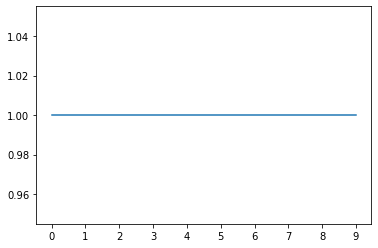

In [ ]:
with open('json_file/p1.json') as json_file:
    data = json.load(json_file)
    plt.plot(list(data.keys()),list(data.values()))